In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier

In [4]:
df = pd.read_csv("E:\TouhidDYP\DSBDA Lab\Social_Network_Ads.csv")

In [5]:
df.shape

(400, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [7]:
df.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [8]:
df.tail(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
390,15807837,Male,48,33000,1
391,15592570,Male,47,23000,1
392,15748589,Female,45,45000,1
393,15635893,Male,60,42000,1
394,15757632,Female,39,59000,0
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [9]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [10]:
df.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [11]:
print(df.to_string())

      User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
5    15728773    Male   27            58000          0
6    15598044  Female   27            84000          0
7    15694829  Female   32           150000          1
8    15600575    Male   25            33000          0
9    15727311  Female   35            65000          0
10   15570769  Female   26            80000          0
11   15606274  Female   26            52000          0
12   15746139    Male   20            86000          0
13   15704987    Male   32            18000          0
14   15628972    Male   18            82000          0
15   15697686    Male   29            80000          0
16   15733883    Male   47            25000          1
17   15617

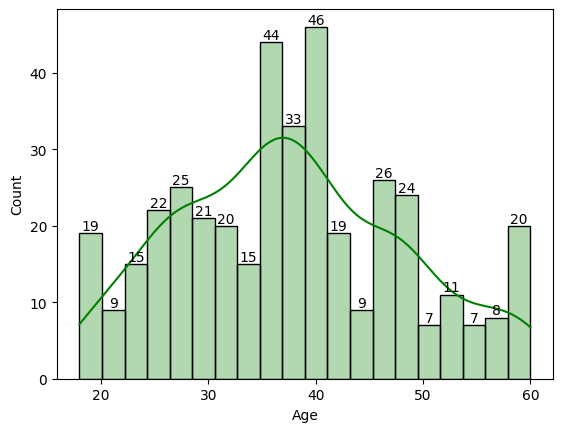

In [12]:
histplot = sns.histplot(df['Age'], kde=True, bins=20, color='green', alpha=0.3)
for i in histplot.containers:
    histplot.bar_label(i,)
plt.show()

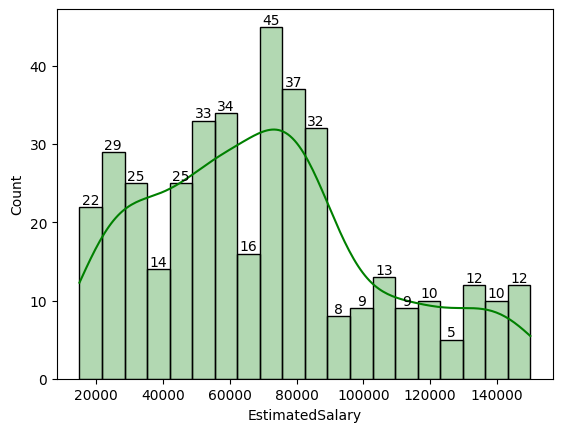

In [13]:
histplot = sns.histplot(df['EstimatedSalary'], kde=True, bins=20, color='green', alpha=0.3)
for i in histplot.containers:
    histplot.bar_label(i,)
plt.show()

In [14]:
def gender_num(gender):
    if(gender == 'Male'):
        return 1
    elif(gender == 'Female'):
        return 0
    else:
        return -1

In [15]:
df['Gender'] = df['Gender'].apply(gender_num)

In [16]:
df.corr()

,User ID,Gender,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.025249,-0.000721,0.071097,0.007120
Gender,-0.025249,1.000000,-0.073741,-0.060435,-0.042469
Age,-0.000721,-0.073741,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,-0.060435,0.155238,1.000000,0.362083
Purchased,0.007120,-0.042469,0.622454,0.362083,1.000000


Text(0.5, 1.0, 'Correlation Matrix of Social Networking Ads')

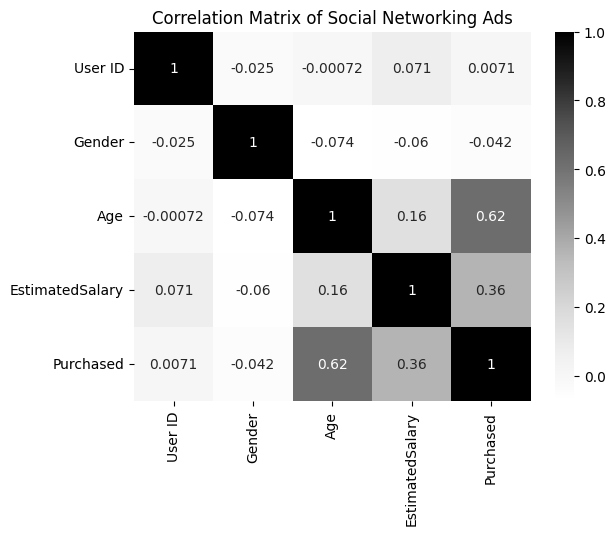

In [17]:
sns.heatmap(df.corr(), cmap = 'Greys', annot=True)
plt.title("Correlation Matrix of Social Networking Ads")

In [18]:
df.sort_values('Age',ascending = True)


,User ID,Gender,Age,EstimatedSalary,Purchased
76,15746737,1,18,52000,0
165,15578738,0,18,86000,0
51,15764195,0,18,44000,0
14,15628972,1,18,82000,0
141,15666141,0,18,68000,0
...,...,...,...,...,...
393,15635893,1,60,42000,1
370,15611430,0,60,46000,1
223,15593715,1,60,102000,1
355,15606472,1,60,34000,1


In [19]:
df.sort_values('EstimatedSalary',ascending = True)

,User ID,Gender,Age,EstimatedSalary,Purchased
92,15809823,1,26,15000,0
43,15792008,1,30,15000,0
155,15610140,0,31,15000,0
150,15679651,0,26,15000,0
32,15573452,0,21,16000,0
...,...,...,...,...,...
168,15789815,1,29,148000,1
103,15675949,0,33,149000,1
240,15701537,1,42,149000,1
211,15735878,1,52,150000,1


In [20]:
std_age = np.std(df['Age'])
mean_age = np.mean(df['Age'])
print("Standard deviation of Age ",std_age)
print("Mean of Age ",mean_age)

Standard deviation of Age  10.46976480156073
Mean of Age  37.655


In [21]:
threshold = 3
outlier = [] 
for i in df['Age']: 
    z = (i-mean_age)/std_age 
    if z > threshold: 
        outlier.append(i) 
print('outlier in dataset is', outlier) 

outlier in dataset is []


In [22]:
x = df[['Age','EstimatedSalary']]
y = df['Purchased']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, train_size=0.8, random_state=0)

In [23]:
x_test

,Age,EstimatedSalary
132,30,87000
309,38,50000
341,35,75000
196,30,79000
246,35,50000
...,...,...
14,18,82000
363,42,79000
304,40,60000
361,53,34000


In [24]:
y_train

336    1
64     0
55     0
106    0
300    1
      ..
323    1
192    0
117    0
47     0
172    0
Name: Purchased, Length: 320, dtype: int64

In [25]:
x_train.shape


(320, 2)

In [26]:
x_test.shape


(80, 2)

In [27]:
y_train.shape


(320,)

In [28]:
y_test.shape

(80,)

In [29]:
dt_model = DecisionTreeClassifier()

dt_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [30]:
dt_prediction = dt_model.predict(x_test)

report = classification_report(y_test, dt_prediction)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        58
           1       0.83      0.86      0.84        22

    accuracy                           0.91        80
   macro avg       0.89      0.90      0.89        80
weighted avg       0.91      0.91      0.91        80



In [31]:
dt_accuracy = accuracy_score(y_test, dt_prediction)
print('Accuracy of Decision Tree model :', dt_accuracy)

Accuracy of Decision Tree model : 0.9125


In [32]:
confu_Matrix_df = confusion_matrix(y_test, dt_prediction)
confu_Matrix_df

array([[54,  4],
       [ 3, 19]], dtype=int64)

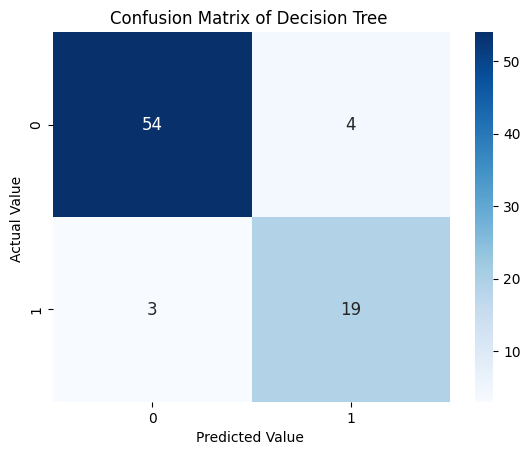

In [33]:
sns.heatmap(confu_Matrix_df, annot=True, cmap='Blues', fmt='d', annot_kws={'fontsize':12})
plt.title('Confusion Matrix of Decision Tree ', fontsize=12)
plt.xlabel('Predicted Value ', fontsize=10)
plt.ylabel('Actual Value ', fontsize=10)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)
plt.show()

In [35]:
logistic_model = LogisticRegression()

logistic_model.fit(x_train, y_train)

LogisticRegression()

In [36]:
logistic_pred = logistic_model.predict(x_test)

accuracy = accuracy_score(y_test, logistic_pred)
print('accuracy of Logistic Regression Model : ',accuracy)

accuracy of Logistic Regression Model :  0.9125


In [37]:
report = classification_report(y_test, logistic_pred)
print(report)

              precision    recall  f1-score   support

           0       0.92      0.97      0.94        58
           1       0.89      0.77      0.83        22

    accuracy                           0.91        80
   macro avg       0.91      0.87      0.89        80
weighted avg       0.91      0.91      0.91        80



In [38]:
confu_Matrix_logistic_Reg = confusion_matrix(y_test, logistic_pred)
confu_Matrix_logistic_Reg

array([[56,  2],
       [ 5, 17]], dtype=int64)

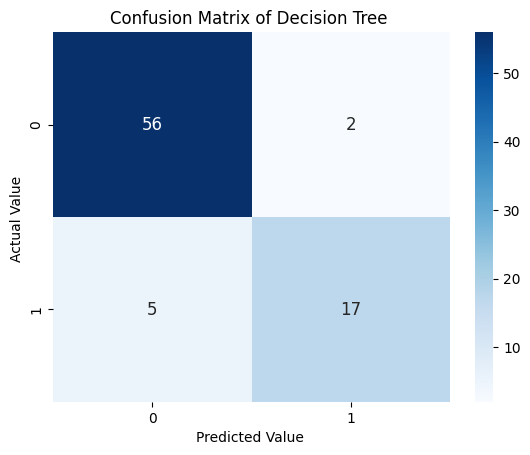

In [39]:
sns.heatmap(confu_Matrix_logistic_Reg, annot=True, cmap='Blues',
            fmt='d', annot_kws={'fontsize':12})
plt.title('Confusion Matrix of Decision Tree ', fontsize=12)
plt.xlabel('Predicted Value ', fontsize=10)
plt.ylabel('Actual Value ', fontsize=10)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)
plt.show()